# Assignment SVM SalaryData
Prepare a classification model using SVM for salary data
Data Description:

age -- age of a person

workclass -- A work class is a grouping of work

education -- Education of an individuals

maritalstatus -- Marital status of an individulas

occupation -- occupation of an individuals

relationship --

race -- Race of an Individual

sex -- Gender of an Individual

capitalgain -- profit received from the sale of an investment

capitalloss -- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week

native -- Native of an individual

Salary -- salary of an individual

#Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [ ]:
TestData=pd.read_csv("SalaryData_Train(1).csv")

#EDA

In [ ]:
TestData.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#Finding the duplicates rows

In [ ]:
TestData[TestData.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
TestData=TestData.drop_duplicates()

In [ ]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            26903 non-null  int64 
 1   workclass      26903 non-null  object
 2   education      26903 non-null  object
 3   educationno    26903 non-null  int64 
 4   maritalstatus  26903 non-null  object
 5   occupation     26903 non-null  object
 6   relationship   26903 non-null  object
 7   race           26903 non-null  object
 8   sex            26903 non-null  object
 9   capitalgain    26903 non-null  int64 
 10  capitalloss    26903 non-null  int64 
 11  hoursperweek   26903 non-null  int64 
 12  native         26903 non-null  object
 13  Salary         26903 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.1+ MB


In [ ]:
TestData.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


#Scatter plot with Histogram


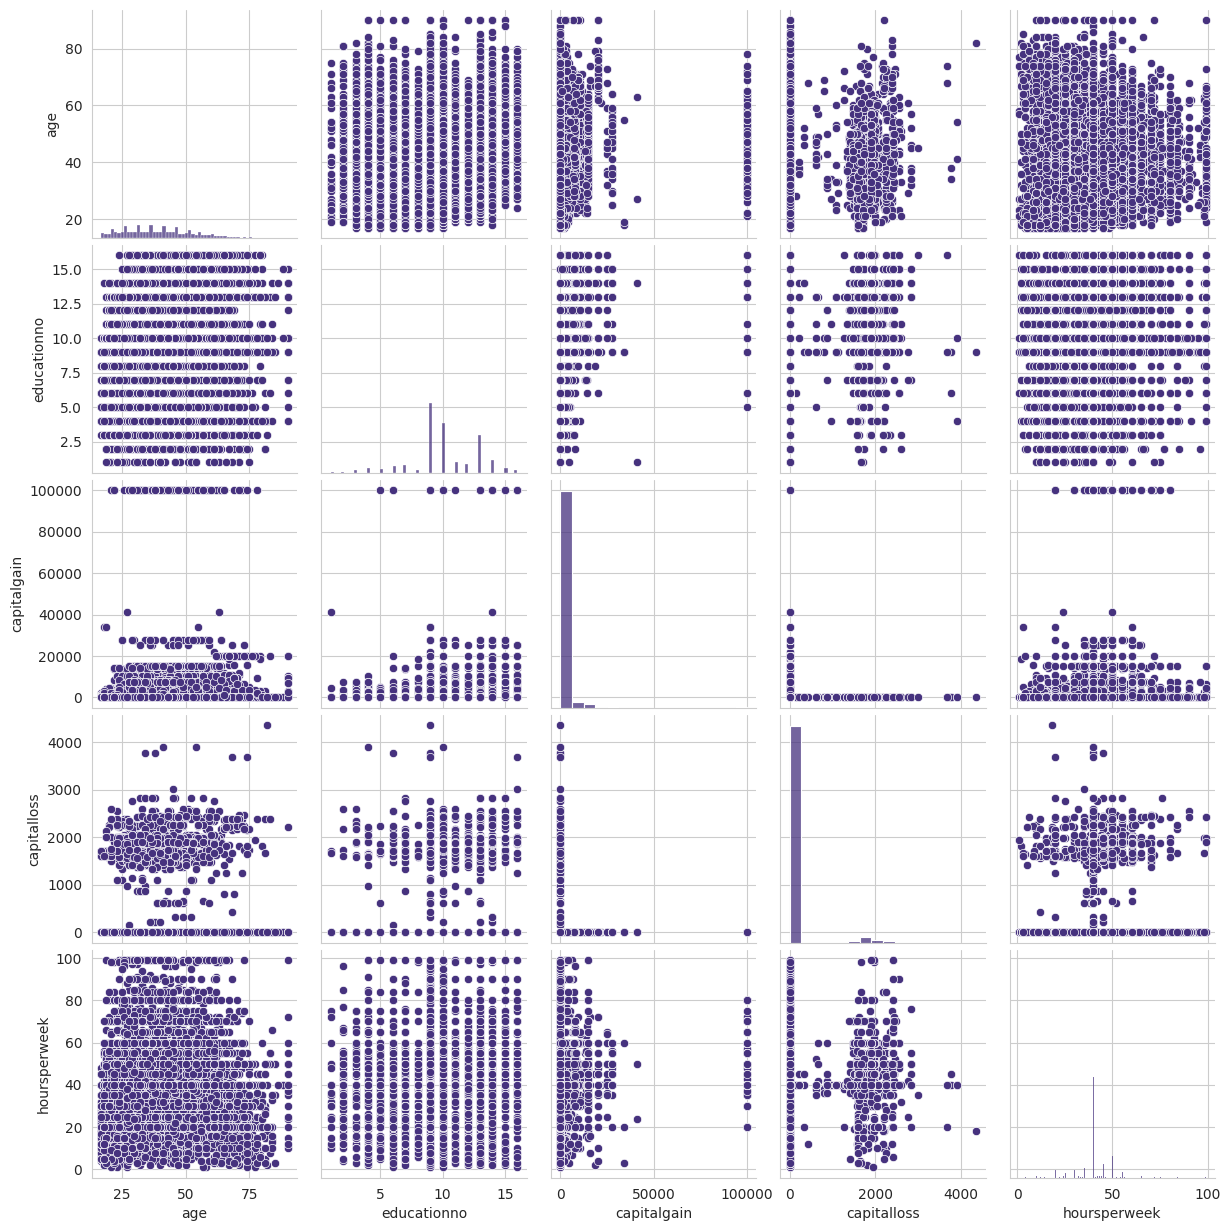

In [ ]:
sns.set_palette('viridis')
sns.set_style(style='whitegrid')
col=["age",	"educationno","capitalgain","capitalloss","hoursperweek"]
sns.pairplot(TestData[col])

#correlation

In [ ]:
col=["age",	"educationno","capitalgain","capitalloss","hoursperweek"]


In [ ]:
TestData[col].corr()


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


<Axes: >

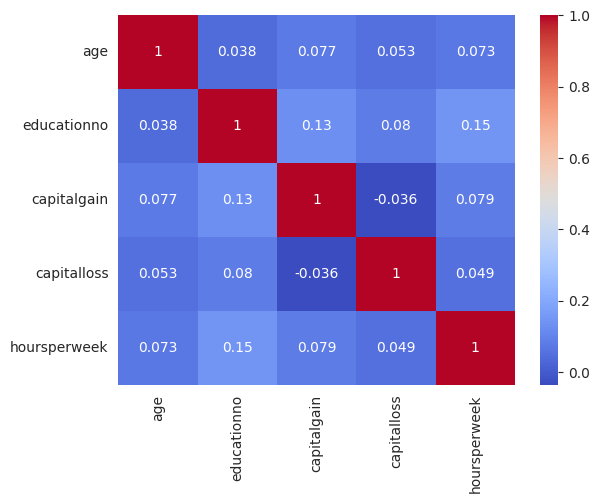

In [ ]:
sns.heatmap(TestData[col].corr(),cmap="coolwarm",annot=True)


([<matplotlib.patches.Wedge at 0x7c4601b732e0>,
 [Text(-0.7917009432559152, -0.7636816198179017, ' <=50K'),
  Text(0.7917009432559157, 0.7636816198179014, ' >50K')],
 [Text(-0.4318368781395901, -0.41655361080976455, '74.4%'),
  Text(0.4318368781395903, 0.41655361080976433, '25.6%')])

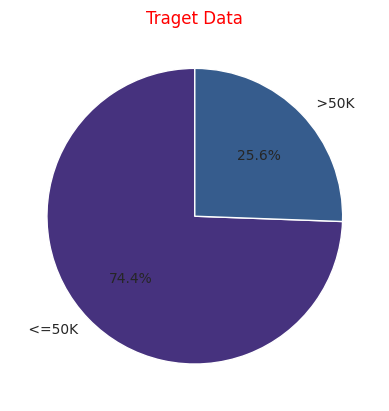

In [ ]:
plt.title("Traget Data",c='red')
sns.set_style("whitegrid")  # Set the plot style
plt.pie(TestData["Salary"].value_counts(),labels=TestData["Salary"].unique(),autopct='%1.1f%%', startangle=90)


Data is unbalanced
#Label Encoding

In [ ]:
label=LabelEncoder()


In [ ]:
TestData["workclass"]=label.fit_transform(TestData["workclass"])
TestData["education"]=label.fit_transform(TestData["education"])
TestData["educationno"]=label.fit_transform(TestData["educationno"])
TestData["maritalstatus"]=label.fit_transform(TestData["maritalstatus"])
TestData["occupation"]=label.fit_transform(TestData["occupation"])
TestData["relationship"]=label.fit_transform(TestData["relationship"])
TestData["race"]=label.fit_transform(TestData["race"])
TestData["sex"]=label.fit_transform(TestData["sex"])
TestData["native"]=label.fit_transform(TestData["native"])
TestData["Salary"]=label.fit_transform(TestData["Salary"])

#Split Data set as X's and Y

In [ ]:
X=TestData.iloc[:,0:13]
Y=TestData.iloc[:,13]

In [ ]:
Y.value_counts()/len(Y)*100


0    74.426644
1    25.573356
Name: Salary, dtype: float64

<=50--------->0

=50---------->1

#Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


#Model Building

In [ ]:
SVM=SVC(C=15, gamma=0.001, kernel='rbf')


In [ ]:
Model=SVM.fit(X_train,Y_train)


In [ ]:
print(accuracy_score(Y_train,Model.predict(X_train)))


0.8563330545488338


In [ ]:
print(classification_report(Y_train,Model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     16102
           1       0.87      0.51      0.64      5420

    accuracy                           0.86     21522
   macro avg       0.86      0.74      0.77     21522
weighted avg       0.86      0.86      0.84     21522



In [ ]:
print(confusion_matrix(Y_train,Model.predict(X_train)))


[[15686   416]
 [ 2676  2744]]


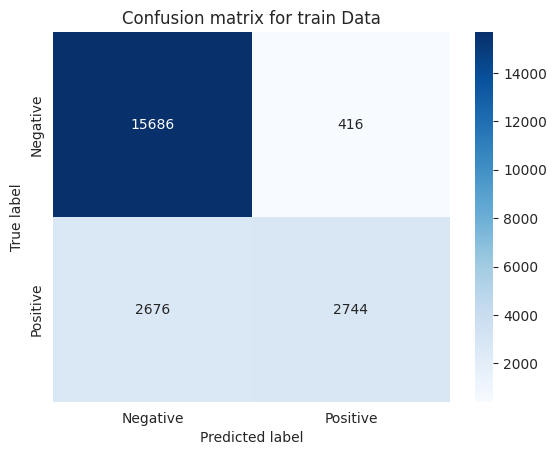

In [ ]:
labels=["Negative","Positive"]
cm=confusion_matrix(Y_train,SVM.predict(X_train))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for train Data')
plt.show()

In [ ]:
Model.support_vectors_

array([[41.,  1., 12., ...,  0., 60., 37.],
       [45.,  2.,  7., ...,  0., 66., 39.],
       [73.,  4.,  9., ...,  0., 30., 37.],
       ...,
       [63.,  3., 12., ...,  0., 68., 37.],
       [40.,  2.,  9., ...,  0., 50., 37.],
       [51.,  1., 11., ...,  0., 40., 37.]])

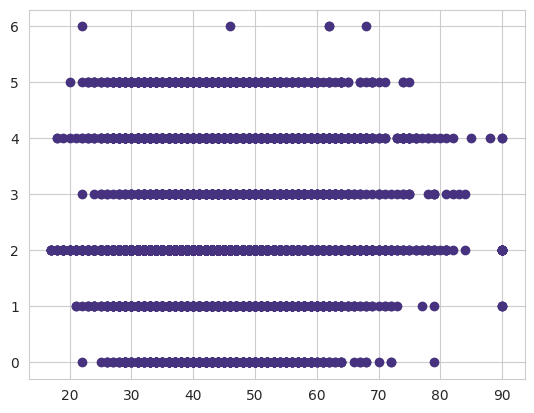

In [ ]:
plt.scatter(Model.support_vectors_[:,0],Model.support_vectors_[:,1])


In [ ]:
print(accuracy_score(Y_test,Model.predict(X_test)))


0.8448243820851143


In [ ]:
print(classification_report(Y_test,Model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3921
           1       0.86      0.51      0.64      1460

    accuracy                           0.84      5381
   macro avg       0.85      0.74      0.77      5381
weighted avg       0.85      0.84      0.83      5381



In [ ]:
print(confusion_matrix(Y_test,Model.predict(X_test)))


[[3803  118]
 [ 717  743]]


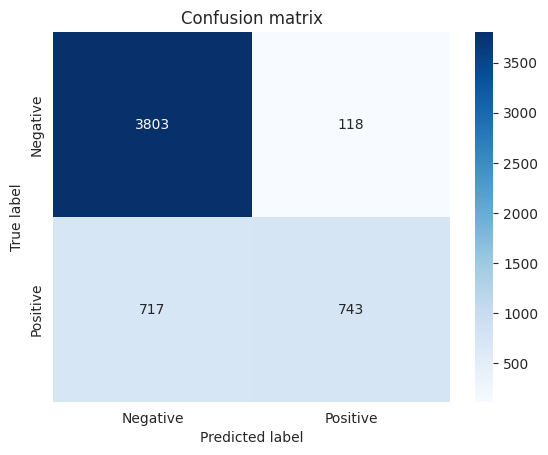

In [ ]:
labels=["Negative","Positive"]
cm=confusion_matrix(Y_test,SVM.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

#Applying Model to Test Data


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [ ]:
Data=pd.read_csv("SalaryData_Test(1).csv")


In [ ]:
Data=Data.drop_duplicates()


In [ ]:
TestData["workclass"]=label.fit_transform(TestData["workclass"])
TestData["education"]=label.fit_transform(TestData["education"])
TestData["educationno"]=label.fit_transform(TestData["educationno"])
TestData["maritalstatus"]=label.fit_transform(TestData["maritalstatus"])
TestData["occupation"]=label.fit_transform(TestData["occupation"])
TestData["relationship"]=label.fit_transform(TestData["relationship"])
TestData["race"]=label.fit_transform(TestData["race"])
TestData["sex"]=label.fit_transform(TestData["sex"])
TestData["native"]=label.fit_transform(TestData["native"])
TestData["Salary"]=label.fit_transform(TestData["Salary"])

In [ ]:
A=TestData.iloc[:,0:13]
B=TestData.iloc[:,13]

In [ ]:
SVM=SVC(C=15, gamma=0.001, kernel='rbf')


In [ ]:
Model=SVM.fit(A,B)


In [ ]:
print(classification_report(B,Model.predict(A)))


              precision    recall  f1-score   support

           0       0.85      0.97      0.91     20023
           1       0.86      0.51      0.64      6880

    accuracy                           0.85     26903
   macro avg       0.86      0.74      0.78     26903
weighted avg       0.86      0.85      0.84     26903

